# Basic Simulations

## State

### Global State

| Name | Description | Type | Symbol | Domain | Initial Value |
| --- | --- | --- | --- | --- | --- |
|Dummy|The dummy entity|Entity Type||| None |
|Qi Supply|The total supply of Qi|Qi Type||| None |
|Quai Supply|The total supply of Quai|Quai Type||| None |
|Locked Qi Supply|The total supply of Qi that is locked|Qi Type||| None |
|Locked Quai Supply|The total supply of Quai that is locked|Quai Type||| None |
|Block Number|The current block that the system is on|Block Number Type||| 0 |
|Block Difficulty|The latest difficulty for blocks|Block Difficulty Type||| 1e9 |
|Historical Converted Qi|An array of the conversions from Qi to Quai. The Qi Values will be negative in each entry and Quai values will be positive. Time is also logged in the entries of the array.|Conversions Array Type||| [] |
|Historical Converted Quai|An array of the conversions from Quai to Qi. The Quai Values will be negative in each entry and Qi values will be positive. Time is also logged in the entries of the array.|Conversions Array Type||| [] |
|Historical Mined Ratio|An array of the historical ratios of mining between Qi and Quai which the miners had chosen at given times. 0 corresponds to 100% Qi, 1 corresponds to 100% Quai, number in between are the increments between those balances.|Mined Ratio Array Type||| [] |
|Historical Qi Hash|An array of the historical amount of hash attributed to Qi in block rewards with block numbers attatched to each entry.|Hash Array Type||| [] |
|Historical Quai Hash|An array of the historical amount of hash attributed to Quai in block rewards with block numbers attatched to each entry.|Hash Array Type||| [] |
|K Qi|The controller coeffecient for Qi.|Gain Type||| 1 |
|K Quai|The controller coeffecient for Quai.|Gain Type||| 1 |
|Quai Price|The current price of Quai.|USD Type||| 1 |
|Qi Price|The current price of Qi.|USD Type||| 1 |
|Simulation History Log|The logged data from simulation history.|Simulation History Log Type||| [] |
|Number of Regions|The current number of regions.|Number of Regions Type||| 2 |
|Zones per Region|The current number of zones in each region.|Zones per Region Type||| 2 |
|Time|The current time in the system.|Datetime Type||| 0 |
|Delta Time|The amount of time covered in the current simulation epoch.|Delta Time Type||| 0 |
|Quai Unlock Schedule|The schedule of Quai token unlocks that will happen in the future|Unlock Schedule Type||| None |
|Qi Unlock Schedule|The schedule of Qi token unlocks that will happen in the future|Unlock Schedule Type||| None |
|Population Mining Beta Vector|The population betas, not known to the controller|Mining Beta Vector Type||| [-0.0001  0.0001] |
|Estimated Mining Beta Vector|The controllers current estimation of the beta vector|Mining Beta Vector Type||| [None, None] |
|Logistic Classifier|The logistic classifier used for beta estimation|Logistic Classifier Type||| None |
|Mining Log|The log of mined blocks|Simulation History Log Type||| None |

## Parameters

| Name | Description | Parameter Class | Symbol | Domain | Initial Value |
| --- | --- | --- | --- | --- | --- |
|Minimum Quai Conversion Amount|The minimum amount of Quai that can be converted|System||| 100 |
|Minimum Qi Conversion Amount|The minimum amount of Qi that can be converted|System||| 100 |
|Asset Return Parameterization|The parameters for determining random assets returns with correlations|Behavioral||| None |
|Price EWMA Lambda|The exponential decay rate for price signals|Behavioral||| 0.05 |
|Hashpower Cost Series|The cost of hashpower by block number|Behavioral||| [...] |
|Qi Price Movemement Sigma|The standard deviation of qi price movements|Behavioral||| 0.01 |
|Quai Price Movemement Sigma|The standard deviation of quai price movements|Behavioral||| 0.01 |
|Speculator Percentage|The percentage of the supply that is speculative|Behavioral||| 0.1 |
|Conversion Percentage Mu|The avergage percentage for conversions of tradeable capital|Behavioral||| 0.01 |
|Conversion Percentage Sigma|The standard deviation for conversions of tradeable capital|Behavioral||| 0.001 |
|PID Parameterization|The PID parameters|System||| None |
|Initial Block Difficulty|The starting block difficulty|System||| None |
|Controller Alpha Parameter|The alpha parameter for tuning the adjustment speed|System||| 0.001 |
|State Update Skipping Parameter|A list of state updates to turn off for debugging and testing purposes|Functional||| [] |
|Population Beta Signal|A list of population beta vectors to use in simulation|Behavioral||| [...] |
|Minimum K Qi|The minimum value allowed for K Qi|System||| 0.2 |
|Block Difficulty Multiples|The difficulty of different levels of blocks as multipliers on global difficulty|System||| {'Prime': 1, 'Region': 0.5, 'Zone': 0.25} |
|Target Mining Time|The target time for mining to take|System||| 60 |
|Quai Reward Base Parameter|The base used for Quai reward computation|System|B|| 2 |
|Aggregate Hashpower Series|A series of the aggregate hashpower to be used at each block number|Behavioral||| [...] |
|Difficulty Adjustment Period|The number of blocks over which difficulty is adjusted|System||| 200 |
|Difficulty Randomness Sigma|The mean value for randomness percentage multiplied into block difficulties (1 being default/average equal to block difficulty)|System||| 0.05 |
|Difficulty Randomness Mu|The standard deviation of the percentage multiplied into block difficulties|System||| 1 |
|Initial Vesting Schedule|The vesting schedule for initial allocations|System||| [{'vesting_amount': 300000000.0, 'vesting_frequency': 'Immediate', 'time': 0, 'recipient': 'Foundation', 'duration': None}, {'vesting_amount': 700000000.0, 'vesting_frequency': 'Monthly', 'time': 0, 'recipient': 'Foundation', 'duration': 6}, {'vesting_amount': 700000000.0, 'vesting_frequency': 'Monthly', 'time': 0, 'recipient': 'Community Incentives', 'duration': 4}, {'vesting_amount': 150000000.0, 'vesting_frequency': 'Immediate', 'time': 0, 'recipient': 'Investors', 'duration': None}, {'vesting_amount': 450000000.0, 'vesting_frequency': 'Monthly', 'time': 0, 'recipient': 'Investors', 'duration': 3}, {'vesting_amount': 122500000.0, 'vesting_frequency': 'Immediate', 'time': 1, 'recipient': 'Founders & Team', 'duration': None}, {'vesting_amount': 367500000.0, 'vesting_frequency': 'Monthly', 'time': 1, 'recipient': 'Founders & Team', 'duration': 3}, {'vesting_amount': 60000000.0, 'vesting_frequency': 'Immediate', 'time': 0, 'recipient': 'Exchanges & MMs', 'duration': None}, {'vesting_amount': 110000000.0, 'vesting_frequency': 'Immediate', 'time': 0, 'recipient': 'Testnet', 'duration': None}, {'vesting_amount': 10000000.0, 'vesting_frequency': 'Immediate', 'time': 0, 'recipient': 'Earn Program', 'duration': None}, {'vesting_amount': 30000000.0, 'vesting_frequency': 'Monthly', 'time': 0, 'recipient': 'Earn Program', 'duration': 2}] |
|Lockup Options|The options for locking up for different time frames|System||| {1: {0.038461538461538464: 1, 0.25: 1.035, 0.5: 1.1, 1: 1.25}, 2: {0.038461538461538464: 1, 0.25: 1.0175, 0.5: 1.05, 1: 1.15}, 3: {0.038461538461538464: 1, 0.25: 1.00875, 0.5: 1.025, 1: 1.0625}, 4: {0.038461538461538464: 1, 0.25: 1.004375, 0.5: 1.0125, 1: 1.03125}, 5: {0.038461538461538464: 1, 0.25: 1.002188, 0.5: 1.00625, 1: 1.015625}} |

In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import (state_base, params_base, vesting_schedule_translate,
                        build_logistic_classifier, post_processing_function,
                        plot_beta_errors, plot_betas, plot_boxplot_betas, difficulty_metrics,
                        reward_metrics, controller_metrics, mined_ratio_metrics,
                        plot_beta_error_norm, plot_mined_block_percent,
                        plot_block_difficulty, beta_convergance, plot_kqi_ratio,
                        beta_convergance2, difficulty_mining_scatter)
import numpy as np

ms = load_from_json(deepcopy(math_spec_json))


## Global Inputs

In [2]:
# Number of prime blocks
T = 2000

# Blocks to run
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Update Population Beta Wiring",
            "Log Simulation Data Mechanism",] * T

# Block by block hashpower
# aggregate_hashpower_series = [25 for _ in range(1, 10002)]
#aggregate_hashpower_series = [2.5e8 for _ in range(1, 10002)]
aggregate_hashpower_series = np.random.normal(2.5e8, 1e7, 10001)

def display_results(df, metrics):
    print("Metrics:")
    print(metrics)
    print()
    print("Data:")
    print(df)
    print()
    print("Visualizations:")
    print()
    plot_beta_errors(df)
    plot_beta_error_norm(df)
    plot_betas(df)
    plot_boxplot_betas(df)
    plot_mined_block_percent(df)
    plot_block_difficulty(df)
    plot_kqi_ratio(df)
    difficulty_mining_scatter(df)

## Sanity Check 0: Constant Difficulty, K Qi, K Quai, Population Beta Values

A simulation with the above state updates turned off to test basic simulation running.

Placeholder has no control action options
Metrics:
Difficulty Mu                        1.000000e+09
Difficulty Sigma                     0.000000e+00
Block Reward Ratio Mu                2.989735e-08
Block Reward Ratio Sigma             6.619099e-24
Conversion Rate Mu                   1.442695e-09
Conversion Rate Sigma                2.068468e-25
K Qi / K Quai Mu                     1.000000e+00
K Qi / K Quai Sigma                  0.000000e+00
Mined Ratio (Block Percent) Mu       5.001562e-01
Mined Ratio (Block Percent) Sigma    1.244280e-01
dtype: float64

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1         -10.243260    3.073125e-07           -0.3344      1.000000e-08   
2          -6.848282    2.048906e-07           -0.3344      1.000000e-08   
3          -5.159655    1.548824e-07           -0.3344      1.000000e-08   
4          -5.082558    1.532223e-07           

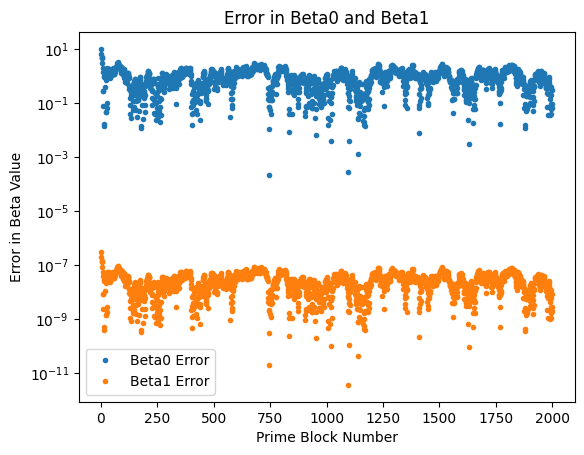

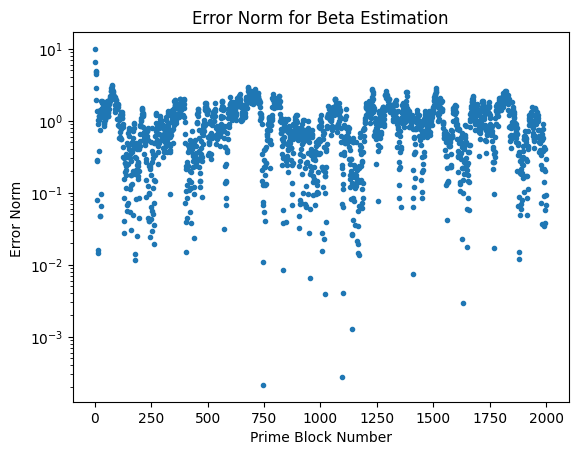

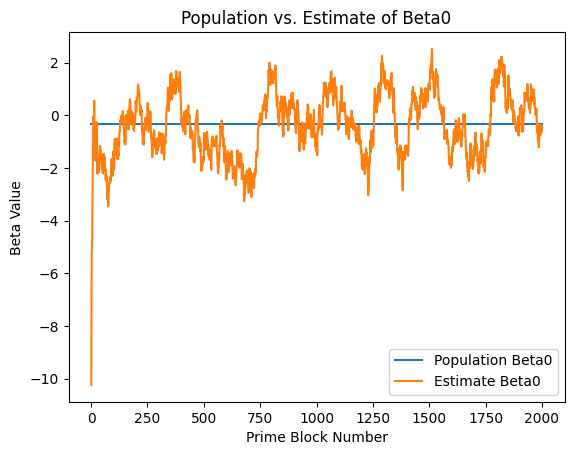

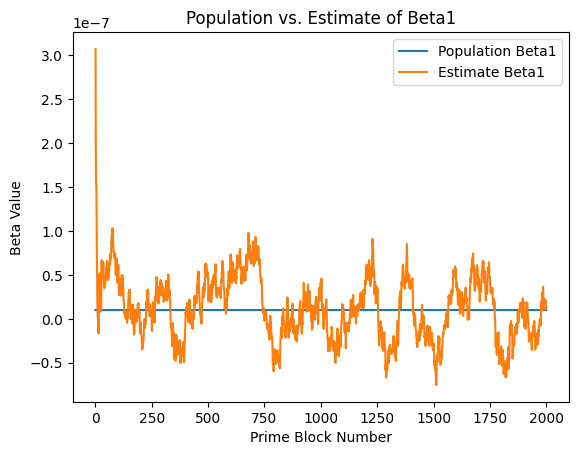

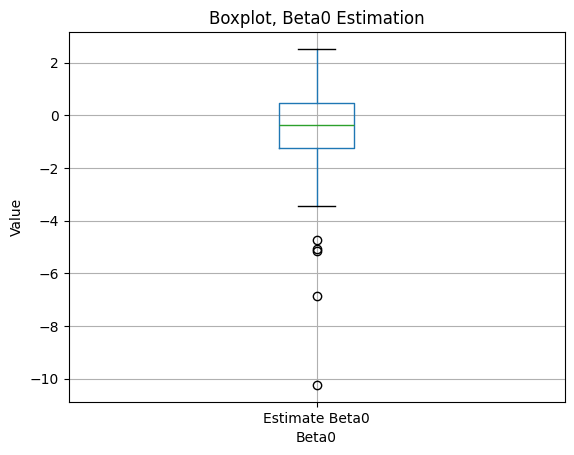

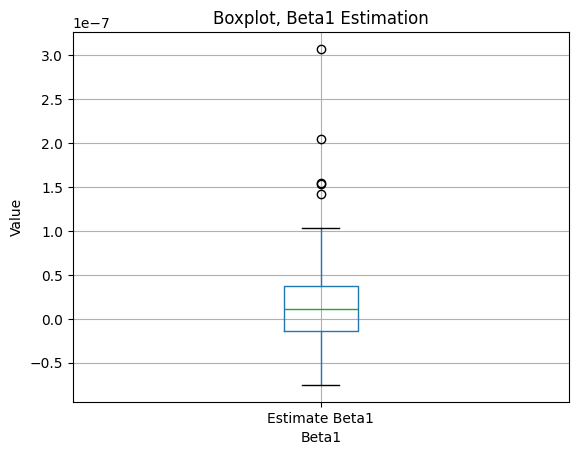

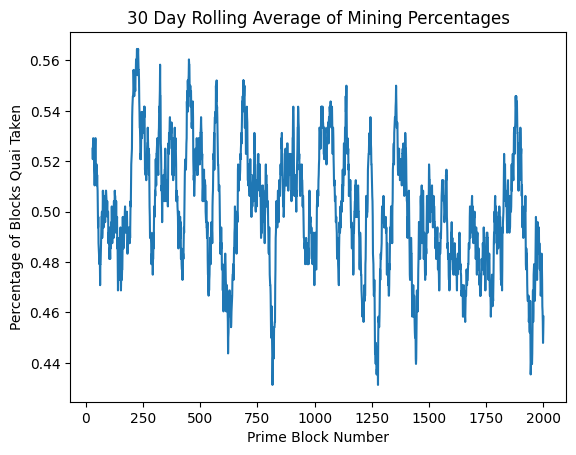

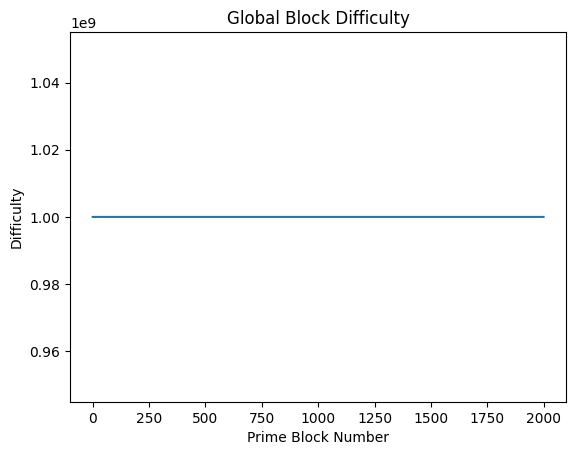

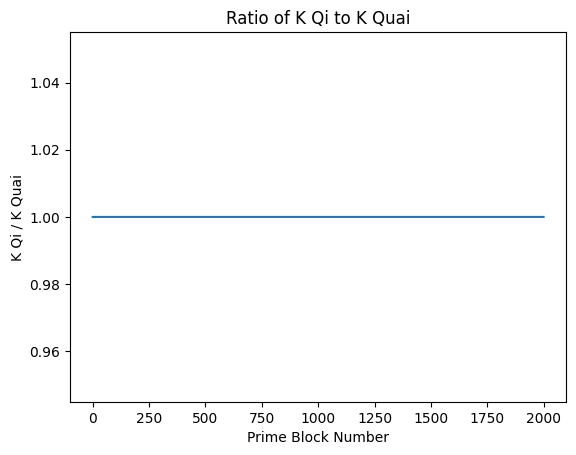

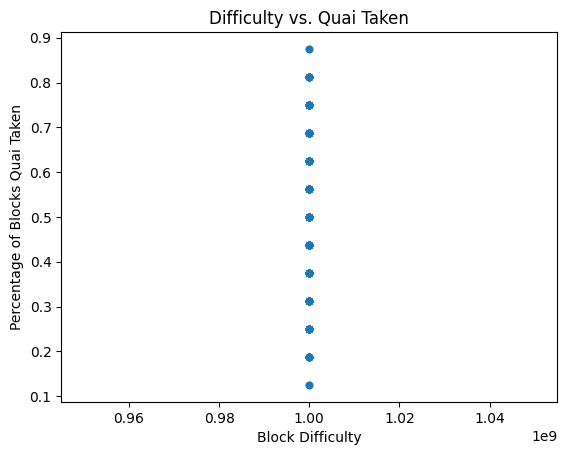

In [3]:
experiment = {"Name": "Sanity Check 0",
               "Param Modifications": {"State Update Skipping Parameter": ["K Qi/Quai", "Difficulty", "Population Beta"],
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics = ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics])

display_results(df, metrics)

## Scenario A: Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.



Placeholder has no control action options
Metrics:
Difficulty Mu                        1.220068e+09
Difficulty Sigma                     5.286945e+07
Block Reward Ratio Mu                2.478803e-08
Block Reward Ratio Sigma             1.141356e-09
Conversion Rate Mu                   1.184956e-09
Conversion Rate Sigma                5.746618e-11
K Qi / K Quai Mu                     1.000000e+00
K Qi / K Quai Sigma                  0.000000e+00
Mined Ratio (Block Percent) Mu       4.787500e-01
Mined Ratio (Block Percent) Sigma    1.269606e-01
dtype: float64

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1           4.397572   -1.328554e-07           -0.3344      1.000000e-08   
2           3.660084   -1.098919e-07           -0.3344      1.000000e-08   
3          -4.013286    1.197864e-07           -0.3344      1.000000e-08   
4          -0.161561    4.819405e-09           

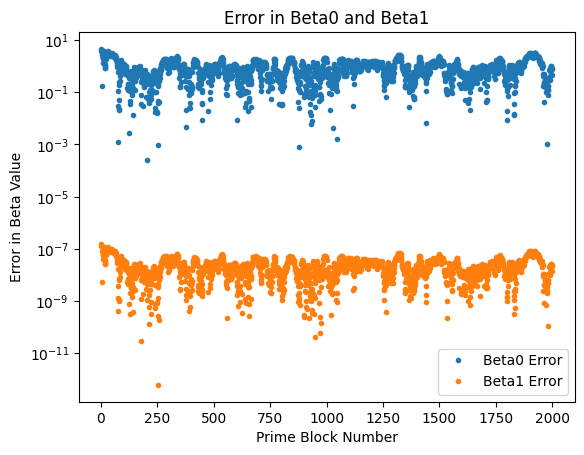

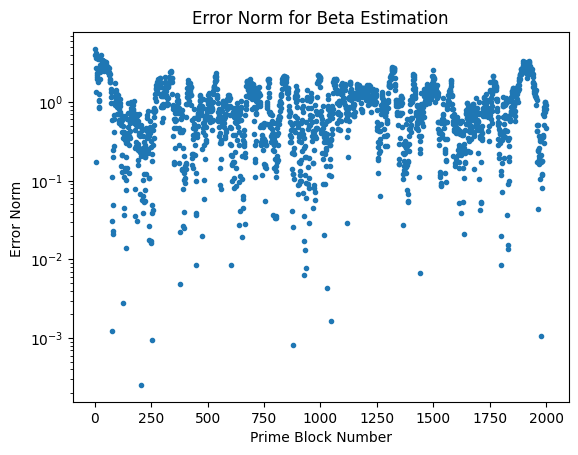

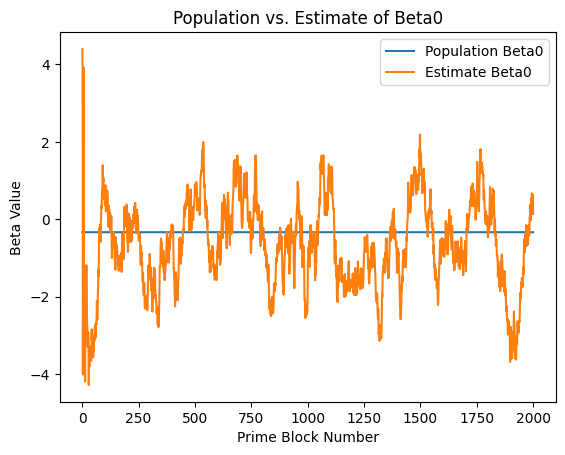

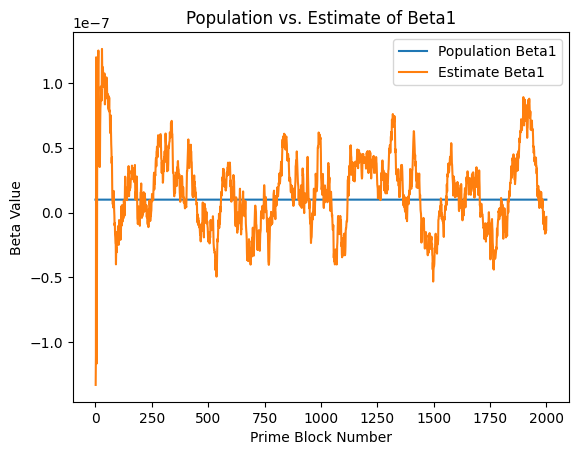

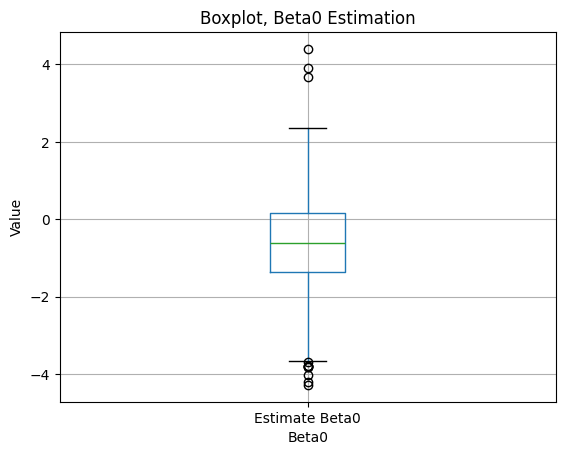

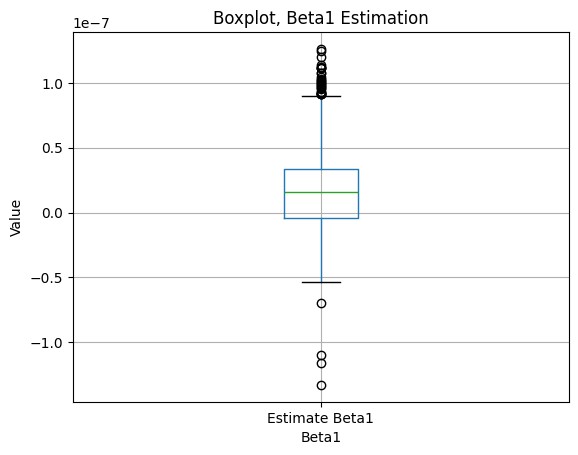

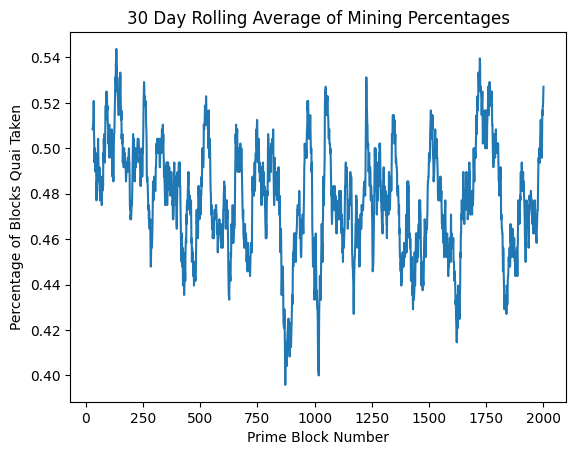

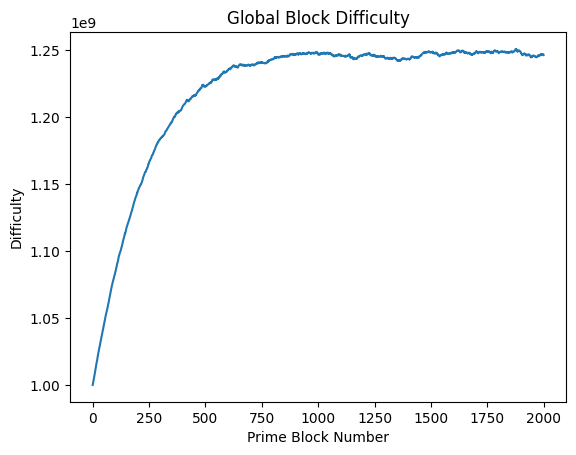

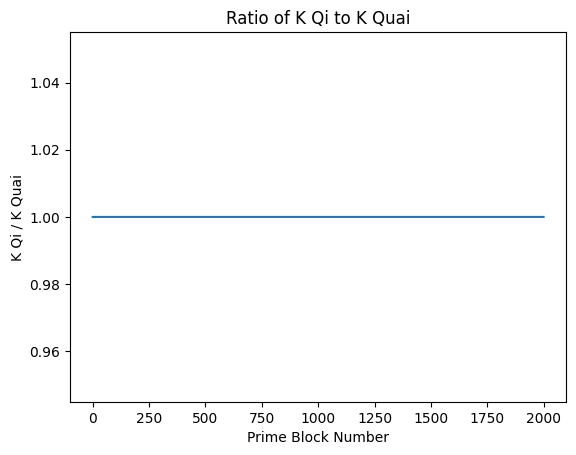

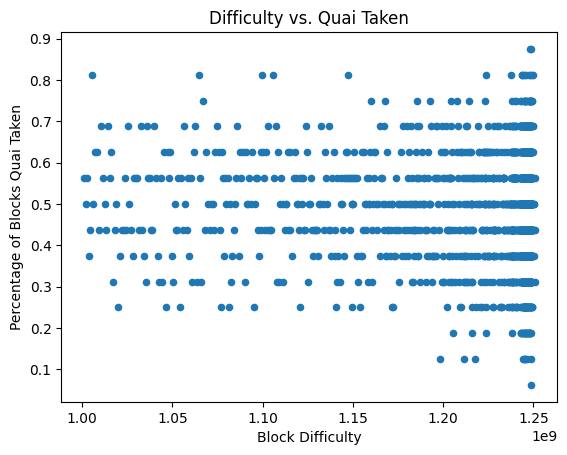

In [4]:
experiment = {"Name": "Scenario A: Variable Difficulty, Value Controller Off",
               "Param Modifications": {"State Update Skipping Parameter": ["K Qi/Quai", "Population Beta"],
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics])

display_results(df, metrics)

### Scenario B: fixed population parameters, miner model

Premise: To test the controller's ability to learn the miner decision population parameter vector when it is fixed, and to analyze the resulting time series.

**Condition(s)**: Fix the values of:
- $k_{qi}$ (control parameter $u_1$), as this is a _numeraire_ for the system; and
- $\pmb{\beta}$, the _miner decision population parameter vector_.


Placeholder has no control action options
Metrics:
Difficulty Mu                        1.219340e+09
Difficulty Sigma                     5.274235e+07
Block Reward Ratio Mu                2.467122e-08
Block Reward Ratio Sigma             1.171586e-09
Conversion Rate Mu                   1.179409e-09
Conversion Rate Sigma                5.890063e-11
K Qi / K Quai Mu                     1.005364e+00
K Qi / K Quai Sigma                  1.412457e-03
Mined Ratio (Block Percent) Mu       4.844062e-01
Mined Ratio (Block Percent) Sigma    1.245184e-01
Time to Beta Convergance             6.000000e+00
dtype: float64

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1         -14.377381    4.305255e-07           -0.3344      1.000000e-08   
2         -16.352712    4.865662e-07           -0.3344      1.000000e-08   
3         -11.539926    3.437777e-07           -0.3344      1.000000e-08 

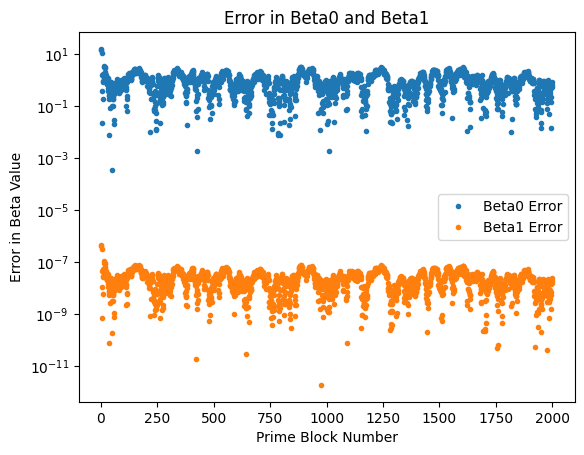

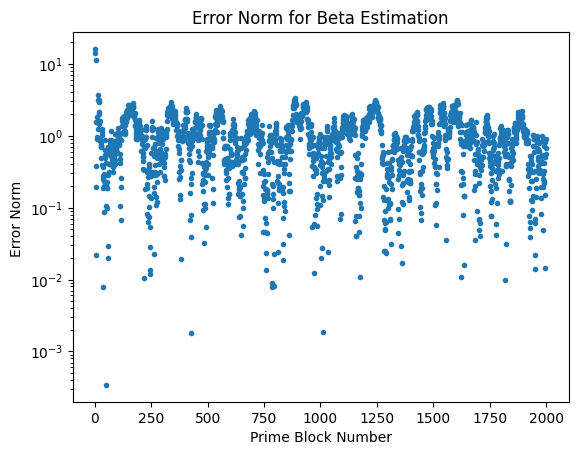

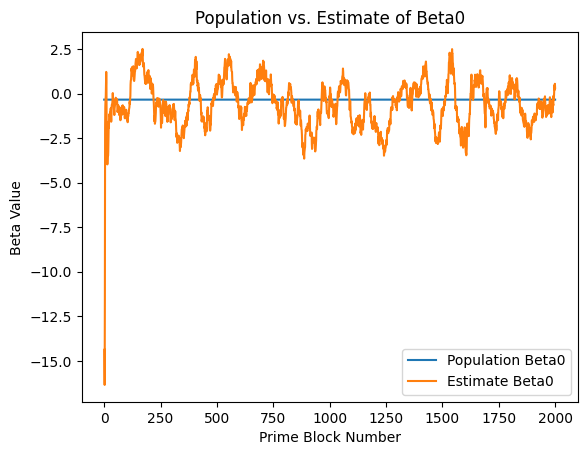

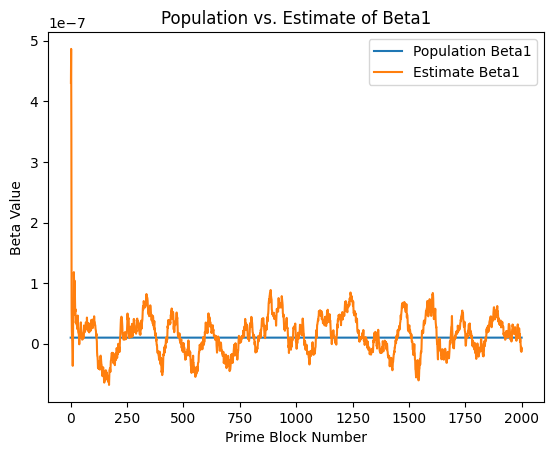

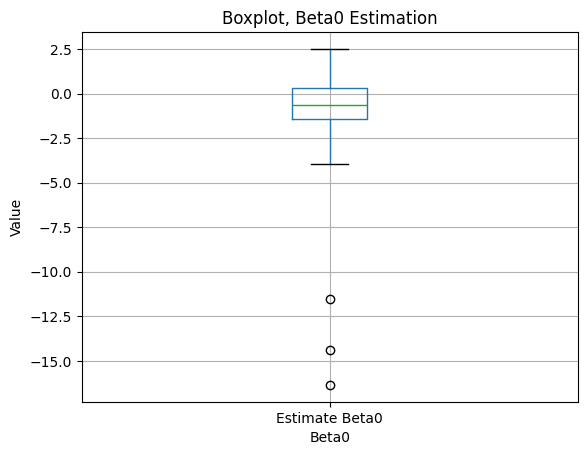

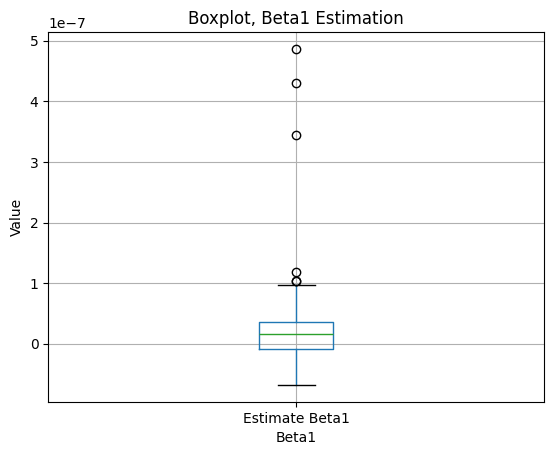

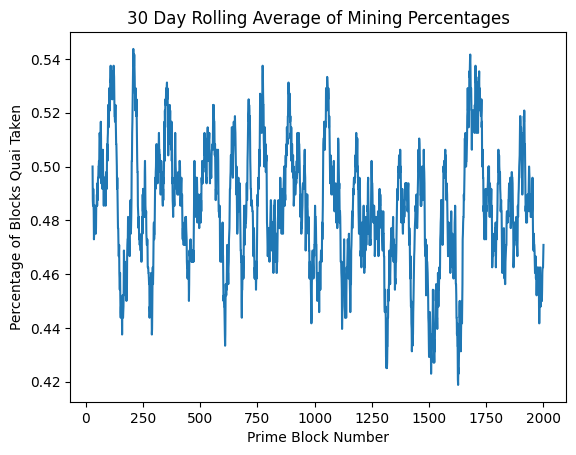

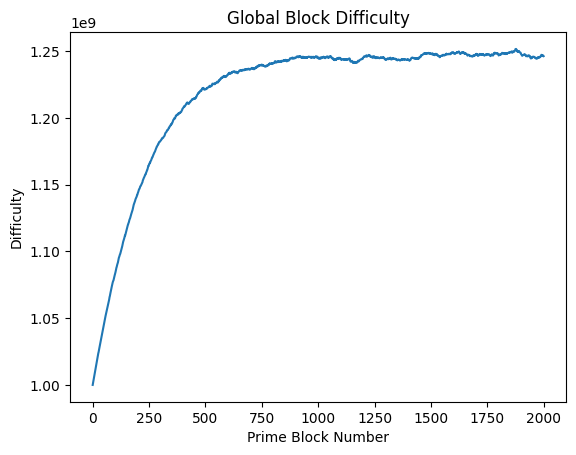

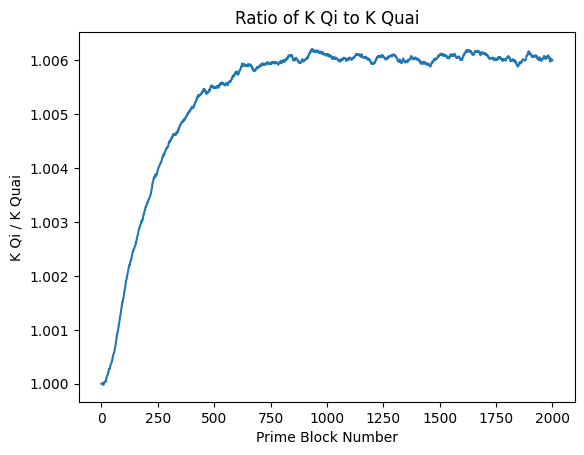

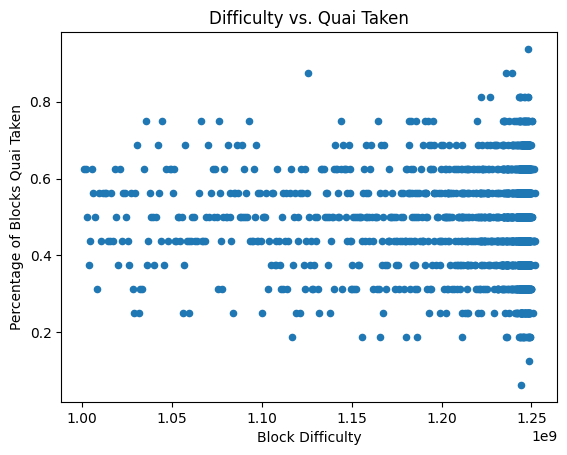

In [5]:
experiment = {"Name": "Scenario B: Variable Difficulty, Value Controller On",
               "Param Modifications": {"State Update Skipping Parameter": ["Population Beta"],
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance])

display_results(df, metrics)

### Scenario C: variable population parameters, miner model

Premise: To test the controller's ability to learn the miner decision population parameter vector when it occasionally changes, and to analyze the resulting time series.

**Condition(s)**: 
- Fix the values of:
    - $k_{qi}$ (control parameters $u_1$), as this is a _numeraire_ for the system.
- Draw a realization of $\pmb{\beta}$ from a fixed distribution at two times:
    - Prior to the beginning of each run; and
    - Halfway through each run.


Placeholder has no control action options
Metrics:
Difficulty Mu                        1219813940.030321
Difficulty Sigma                       52677726.741174
Block Reward Ratio Mu                              0.0
Block Reward Ratio Sigma                           0.0
Conversion Rate Mu                                 0.0
Conversion Rate Sigma                              0.0
K Qi / K Quai Mu                              1.005773
K Qi / K Quai Sigma                            0.00166
Mined Ratio (Block Percent) Mu                0.400313
Mined Ratio (Block Percent) Sigma             0.150011
Time to Beta Re-stabilization                     62.0
Beta re-stabilized?                               True
dtype: object

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1          -0.179613    5.363230e-09           -0.3344      1.000000e-08   
2           6.172908   -1.845885e-07    

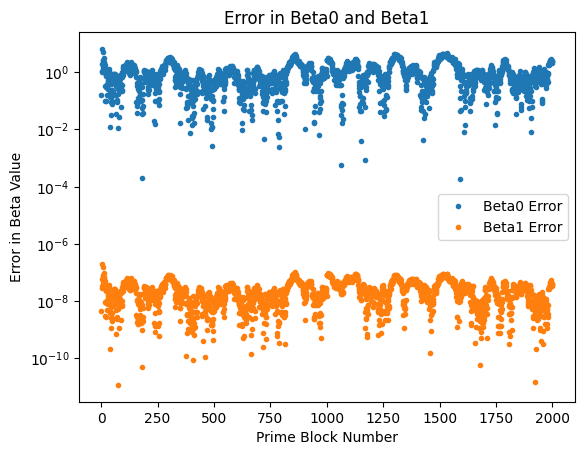

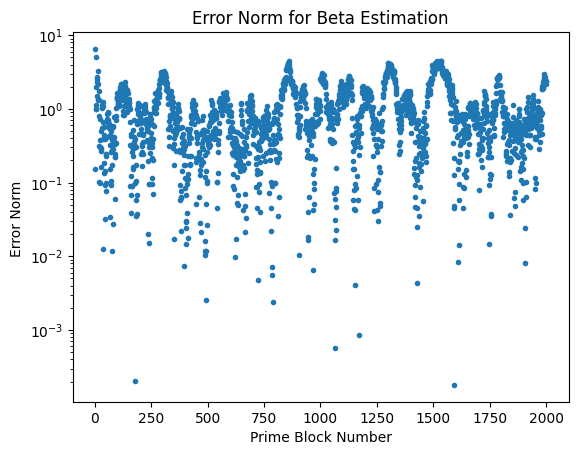

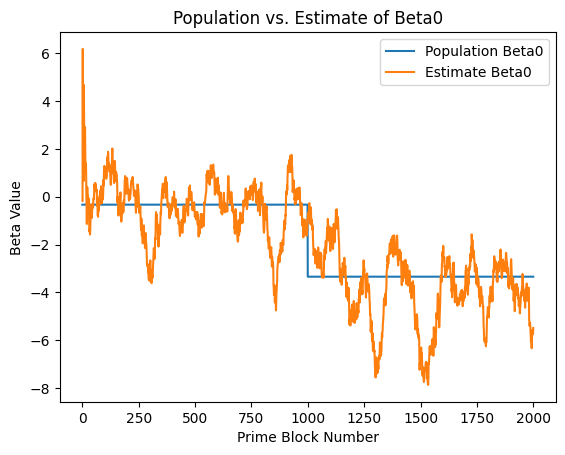

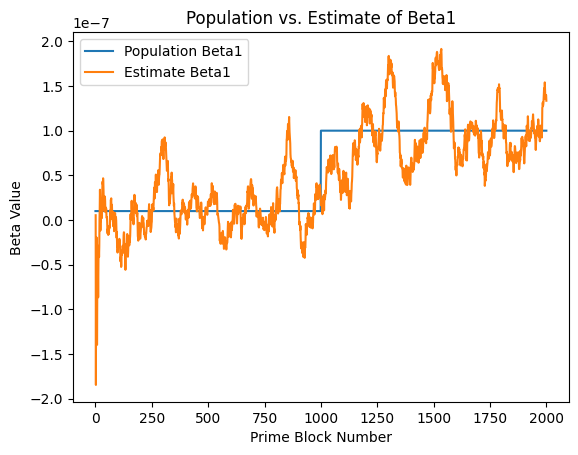

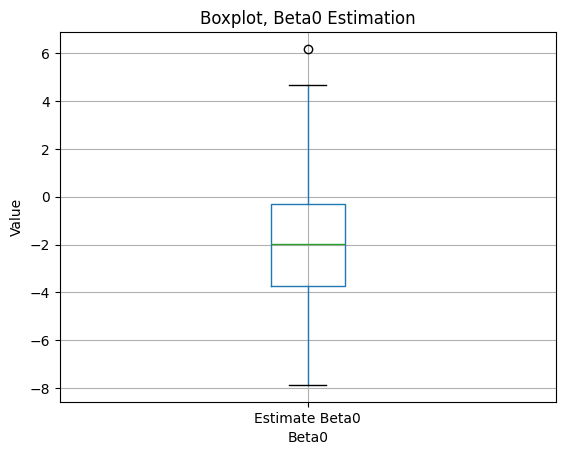

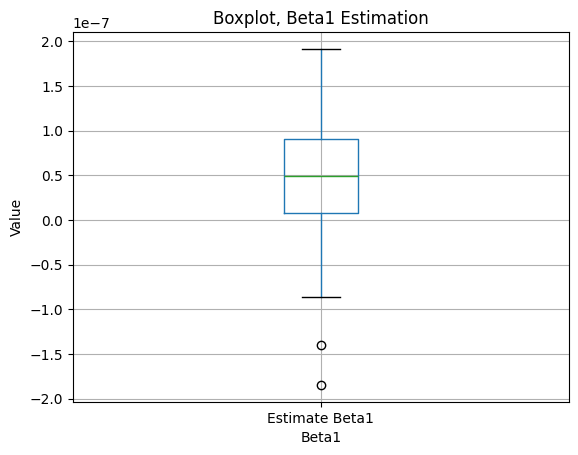

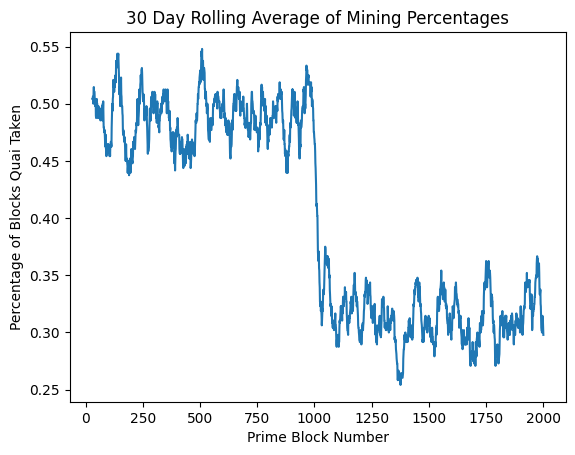

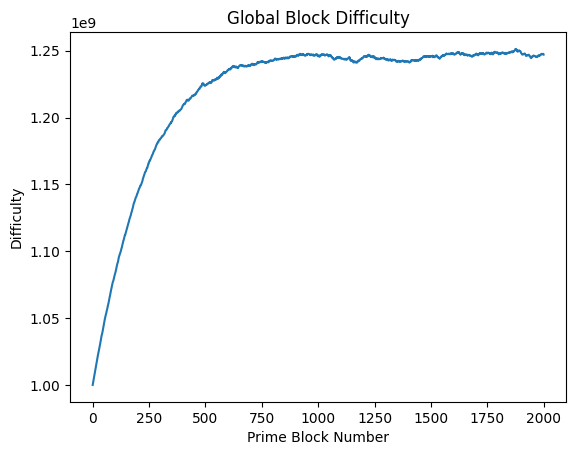

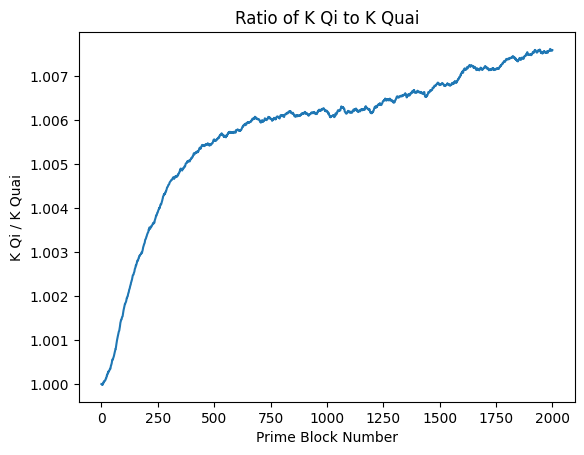

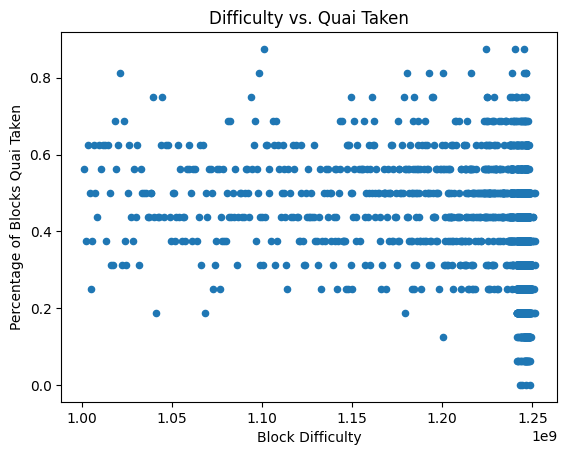

In [6]:
experiment = {"Name": "Scenario C: Variable Difficulty, Variable Population Betas, Value Controller On",
               "Param Modifications": {"State Update Skipping Parameter": [],
                                       "Population Beta Signal": [np.array([-0.3344, 1e-8])] * (T//2) +
                                       [np.array([-3.344, 1e-7])] * (T//2+1),
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance2])

display_results(df, metrics)

## Scenario D

In [7]:
'''experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": [],
                                       "Population Beta Signal": [np.array([-2, 0.05, -.05])] * (T+2),
                                       "Aggregate Hashpower Series": aggregate_hashpower_series,
                                       "FP Mining Payment Policy": "Logistic Probability Payment Policy V2",},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-2, 0.05, -.05])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance2])

display_results(df, metrics)'''

'experiment = {"Name": "Test",\n               "Param Modifications": {"State Update Skipping Parameter": [],\n                                       "Population Beta Signal": [np.array([-2, 0.05, -.05])] * (T+2),\n                                       "Aggregate Hashpower Series": aggregate_hashpower_series,\n                                       "FP Mining Payment Policy": "Logistic Probability Payment Policy V2",},\n               "State Modifications": {"Block Difficulty": 1000,\n                                       "Population Mining Beta Vector": np.array([-2, 0.05, -.05])},\n               "Blocks": blocks}\n\n\nstate, params, msi, df, metrics= ms.run_experiment(experiment,\n                  params_base,\n                  state_base,\n                  post_processing_function,\n                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],\n                  parameter_preperation_functions=[],\n                  metrics_functions=[d

## Scenario E

In [8]:
'''experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": [],
                                       "Population Beta Signal": [np.array([-4, 0.05, -.05])] * (T+2),
                                       "Aggregate Hashpower Series": aggregate_hashpower_series,
                                       "FP Mining Payment Policy": "Logistic Probability Payment Policy V3",},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-4, 0.05, -.05])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance2])

display_results(df, metrics)'''

'experiment = {"Name": "Test",\n               "Param Modifications": {"State Update Skipping Parameter": [],\n                                       "Population Beta Signal": [np.array([-4, 0.05, -.05])] * (T+2),\n                                       "Aggregate Hashpower Series": aggregate_hashpower_series,\n                                       "FP Mining Payment Policy": "Logistic Probability Payment Policy V3",},\n               "State Modifications": {"Block Difficulty": 1000,\n                                       "Population Mining Beta Vector": np.array([-4, 0.05, -.05])},\n               "Blocks": blocks}\n\n\nstate, params, msi, df, metrics= ms.run_experiment(experiment,\n                  params_base,\n                  state_base,\n                  post_processing_function,\n                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],\n                  parameter_preperation_functions=[],\n                  metrics_functions=[d